In [9]:
using Pkg

In [10]:
Pkg.activate(dirname(pwd()))

  Activating environment at `~/Documents/GitHub/ComputationalHeatTransfer.jl/Project.toml`


In [11]:
using ComputationalHeatTransfer
using Plots
gr()  
using XLSX

In [12]:
using SparseArrays

In [13]:
function getboilhist(sysfinal,tend,boil_dt)
    boil_matrix=spzeros(size(sysfinal[end].wall.Xstations,1),Int64(round(tend/boil_dt)));
    for tnum = 1:size(boil_matrix,2)
         boil_index = findall(x->Int64(round(x/boil_dt))==tnum,boil_data[:,2])

        if length(boil_index) != 0
            i_station_temp = Int64.(boil_data[boil_index,1])
            for i in i_station_temp
                boil_matrix[i,tnum] = 1
            end
        end
    end
    
    boil_num_t = sum(boil_matrix, dims=1)'
    boil_num_x = sum(boil_matrix, dims=2);
    
    boil_num_t,boil_num_x
end

getboilhist (generic function with 1 method)

## Get fluid properties

In [14]:
fluid_type = "butane"
Tᵥ = 291.2

291.2

In [15]:
using UnPack

p_fluid = get_saturation_property(fluid_type,Tᵥ)
@unpack Cpₗ,ρₗ,μₗ,hₗ,kₗ,Prₗ,Cpᵥ,ρᵥ,μᵥ,hᵥ,kᵥ,Prᵥ,σ,P,R,M,Rkg,αₗ,νₗ,νᵥ,hₗᵥ = p_fluid;

## Read data

In [16]:
using JLD2

In [19]:
dirname(dirname(pwd()))

"/Users/yuxuanli/Documents/GitHub"

In [707]:
OHPdata1 = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_10W_E065_2_DT1_large.jld2");
OHPdata2 = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_20W_E065_2_DT1_large.jld2");
OHPdata3 = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_30W_E065_2_DT1_large.jld2");
OHPdata4 = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_40W_E065_2_DT1_large.jld2");
OHPdata1s = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_10W_E065_2_DT1_small.jld2");
OHPdata2s = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_20W_E065_2_DT1_small.jld2");
OHPdata3s = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_30W_E065_2_DT1_small.jld2");
OHPdata4s = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP1_40W_E065_2_DT1_small.jld2");

OHP2data10W = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP2_10W_E070_2_DT1_large.jld2");
OHP2data40W = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP2_40W_E065_2_DT1_large.jld2");

OHP2data10Ws = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP2_10W_E065_2_DT1_small.jld2");
OHP2data40Ws = load(dirname(dirname(dirname(pwd())))*"/OHPnume/OHP2_40W_E065_2_DT1_small.jld2");

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, SYS} where SYS is not a leaf type in workspace; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:237
┌ Warning: read type ODEFunction{true, SciMLBase.FullSpecialize, DiffEqLinearOperator{Float64, CartesianGrids.Laplacian{250, 108, Float64, false, false}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, SYS} where SYS is not a leaf type in workspace; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:237
┌ Warning: read type ODEFunction{true, SciMLBase

┌ Warning: some parameters could not be resolved for type ODEProblem{Vector{Float64},Tuple{Float64, Float64},false,PHPSystem,ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing},Base.Pairs{Symbol,Union{},Tuple{},NamedTuple{(), Tuple{}}},SciMLBase.StandardODEProblem}; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:451
┌ Warning: some parameters could not be resolved for type ODEFunction{true,SciMLBase.FullSpecialize,ConstrainedSystems.#119#120,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing,Nothing}; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/recons

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, SYS} where SYS is not a leaf type in workspace; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:237
┌ Warning: read type ODEFunction{true, SciMLBase.FullSpecialize, DiffEqLinearOperator{Float64, CartesianGrids.Laplacian{250, 108, Float64, false, false}}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, SYS} where SYS is not a leaf type in workspace; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:237
┌ Warning: read type ODEFunction{true, SciMLBase

┌ Warning: some parameters could not be resolved for type ODEProblem{Vector{Float64},Tuple{Float64, Float64},false,PHPSystem,ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing},Base.Pairs{Symbol,Union{},Tuple{},NamedTuple{(), Tuple{}}},SciMLBase.StandardODEProblem}; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/reconstructing_datatypes.jl:451
┌ Warning: some parameters could not be resolved for type ODEFunction{true,SciMLBase.FullSpecialize,ConstrainedSystems.#119#120,LinearAlgebra.UniformScaling{Bool},Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,Nothing,typeof(SciMLBase.DEFAULT_OBSERVED),Nothing,Nothing}; reconstructing
└ @ JLD2 /Users/yuxuanli/.julia/packages/JLD2/Pi1Zq/src/data/recons

In [272]:
# OHPdata1 = load(dirname(pwd())*"/src/OHP1_10W_E063_2_DT1_small.jld2");
# OHPdata2 = load(dirname(pwd())*"/src/OHP1_20W_E063_2_DT1_small.jld2");
# OHPdata3 = load(dirname(pwd())*"/src/OHP1_30W_E063_2_DT1_small.jld2");
# OHPdata4 = load(dirname(pwd())*"/src/OHP1_40W_E063_2_DT1_small.jld2");

In [566]:
OHPdata = OHPdata1
power = 10

10

In [577]:
OHPdata = OHPdata2
power = 20

20

In [719]:
OHPdata = OHPdata3
power = 30

30

In [770]:
OHPdata = OHPdata4
power = 40

40

In [334]:
OHPdata = OHPdata1s
power = 10

10

In [347]:
OHPdata = OHPdata2s
power = 20

20

In [367]:
OHPdata = OHPdata3s
power = 30

30

In [612]:
OHPdata = OHPdata4s
power = 40

40

In [287]:
OHPdata = OHP2data10W
power = 10

10

In [528]:
OHPdata = OHP2data40W
power = 40

40

In [671]:
OHPdata = OHP2data10Ws
power = 10

10

In [685]:
OHPdata = OHP2data40Ws
power = 40

40

## translate JLD2 file

In [771]:
boil_data = OHPdata["boil_data"]
tube_hist = OHPdata["tube_hist"]
sysfinal = getsysfinal(tube_hist);

plate_T_hist = OHPdata["plate_T_hist"]

integrator_plate = OHPdata["integrator_plate"]
sys = integrator_plate.p

Unbounded Heat conduction system on a grid of size 250 x 108 and 0 static immersed points


In [781]:
(1-0.45)*sysfinal[end].tube.L/ length(sysfinal[end].vapor.P)

0.03935182518247132

## Get RTD result for OHP

In [731]:
# filepath = "20190613_F_PD_%23008_O002_H001_P040_expA.xlsx"
# xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath)

# Onum, Hnum, power = getconfig(filepath)
# RTD,RTDt = getRTD(xf,Onum);

## set probe coordinates

In [732]:
const inch = 2.54e-2;

x = [-2.75inch,-1.4inch,-0.8inch,0.0,0.0,0.8inch,1.4inch,2.75inch]
y = [0.0,0.0,0.0,0.0,0.4inch,0.0,0.0,0.0];
X =  VectorData(x,y);

## get interpolation operator

In [733]:
H = Regularize(X,cellsize(sys),I0=origin(sys.grid))
g = ScalarData(X);

## get temperature curve time series

In [734]:
ghist,thist = getgt(g,H,plate_T_hist,tube_hist);

## wettedness

In [735]:
wetness = getwetness(sysfinal); 
Vabs_avg,Vavg,Vabs_max = getV(sysfinal);
δ_avg_start,δ_avg_end = getδ(sysfinal);

In [736]:
Vabs_avg,Vavg,Vabs_max = getV(sysfinal);

In [737]:
δ_avg_start,δ_avg_end = getδ(sysfinal);

## thermal conductance

In [738]:
# power = 10
i1 = 4 #RTD number
i2 = 8 #RTD number


8

## convert data

In [576]:
wetness_10W = getwetness(sysfinal);
Vabs_avg_10W,Vavg_10W,Vabs_max_10W = getV(sysfinal);
δ_avg_start_10W,δ_avg_end_10W = getδ(sysfinal);
conductance_10W = power ./ (ghist[i1] .-ghist[i2]);
thist_10W = thist;
ghist_10W = ghist;

In [586]:
wetness_20W = getwetness(sysfinal);
Vabs_avg_20W,Vavg_20W,Vabs_max_20W = getV(sysfinal);
δ_avg_start_20W,δ_avg_end_20W = getδ(sysfinal);
conductance_20W = power ./ (ghist[i1] .-ghist[i2]);
thist_20W = thist;
ghist_20W = ghist;

In [728]:
wetness_30W = getwetness(sysfinal);
Vabs_avg_30W,Vavg_30W,Vabs_max_30W = getV(sysfinal);
δ_avg_start_30W,δ_avg_end_30W = getδ(sysfinal);
conductance_30W = power ./ (ghist[i1] .-ghist[i2]);
thist_30W = thist;
ghist_30W = ghist;

In [739]:
wetness_40W = getwetness(sysfinal);
Vabs_avg_40W,Vavg_40W,Vabs_max_40W = getV(sysfinal);
δ_avg_start_40W,δ_avg_end_40W = getδ(sysfinal);
conductance_40W = power ./ (ghist[i1] .-ghist[i2]);
thist_40W = thist;
ghist_40W = ghist;

In [56]:
wetness_10Ws = getwetness(sysfinal);
Vabs_avg_10Ws,Vavg_10Ws,Vabs_max_10Ws = getV(sysfinal);
δ_avg_start_10Ws,δ_avg_end_10Ws = getδ(sysfinal);
conductance_10Ws = power ./ (ghist[i1] .-ghist[i2]);
thist_10Ws = thist;
ghist_10Ws = ghist;

In [348]:
wetness_20Ws = getwetness(sysfinal);
Vabs_avg_20Ws,Vavg_20Ws,Vabs_max_20Ws = getV(sysfinal);
δ_avg_start_20Ws,δ_avg_end_20Ws = getδ(sysfinal);
conductance_20Ws = power ./ (ghist[i1] .-ghist[i2]);
thist_20Ws = thist;
ghist_20Ws = ghist;

In [377]:
wetness_30Ws = getwetness(sysfinal);
Vabs_avg_30Ws,Vavg_30Ws,Vabs_max_30Ws = getV(sysfinal);
δ_avg_start_30Ws,δ_avg_end_30Ws = getδ(sysfinal);
conductance_30Ws = power ./ (ghist[i1] .-ghist[i2]);
thist_30Ws = thist;
ghist_30Ws = ghist;

In [622]:
wetness_40Ws = getwetness(sysfinal);
Vabs_avg_40Ws,Vavg_40Ws,Vabs_max_40Ws = getV(sysfinal);
δ_avg_start_40Ws,δ_avg_end_40Ws = getδ(sysfinal);
conductance_40Ws = power ./ (ghist[i1] .-ghist[i2]);
thist_40Ws = thist;
ghist_40Ws = ghist;

In [296]:
wetness_10W_OHP2 = getwetness(sysfinal);
Vabs_avg_10W_OHP2,Vavg_10W_OHP2,Vabs_max_10W_OHP2 = getV(sysfinal);
δ_avg_start_10W_OHP2,δ_avg_end_10W_OHP2 = getδ(sysfinal);
conductance_10W_OHP2 = power ./ (ghist[i1] .-ghist[i2]);
thist_10W_OHP2 = thist;
ghist_10W_OHP2 = ghist;

In [322]:
wetness_40W_OHP2 = getwetness(sysfinal);
Vabs_avg_40W_OHP2,Vavg_40W_OHP2,Vabs_max_40W_OHP2 = getV(sysfinal);
δ_avg_start_40W_OHP2,δ_avg_end_40W_OHP2 = getδ(sysfinal);
conductance_40W_OHP2 = power ./ (ghist[i1] .-ghist[i2]);
thist_40W_OHP2 = thist;
ghist_40W_OHP2 = ghist;

In [679]:
wetness_10Ws_OHP2 = getwetness(sysfinal);
Vabs_avg_10Ws_OHP2,Vavg_10Ws_OHP2,Vabs_max_10Ws_OHP2 = getV(sysfinal);
δ_avg_start_10Ws_OHP2,δ_avg_end_10Ws_OHP2 = getδ(sysfinal);
conductance_10Ws_OHP2 = power ./ (ghist[i1] .-ghist[i2]);
thist_10Ws_OHP2 = thist;
ghist_10Ws_OHP2 = ghist;

In [695]:
wetness_40Ws_OHP2 = getwetness(sysfinal);
Vabs_avg_40Ws_OHP2,Vavg_40Ws_OHP2,Vabs_max_40Ws_OHP2 = getV(sysfinal);
δ_avg_start_40Ws_OHP2,δ_avg_end_40Ws_OHP2 = getδ(sysfinal);
conductance_40Ws_OHP2 = power ./ (ghist[i1] .-ghist[i2]);
thist_40Ws_OHP2 = thist;
ghist_40Ws_OHP2 = ghist;

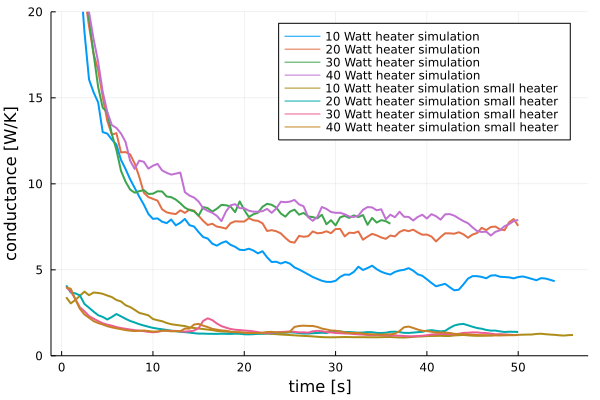

In [740]:
plot(thist_10W,conductance_10W ,label=string(10)*" Watt heater simulation",linewidth=2,ylim=(0,10),xlabel="time [s]", ylabel="conductance [W/K]")
plot!(thist_20W,conductance_20W ,label=string(20)*" Watt heater simulation",linewidth=2,ylim=(0,10),xlabel="time [s]", ylabel="conductance [W/K]")
plot!(thist_30W,conductance_30W ,label=string(30)*" Watt heater simulation",linewidth=2,ylim=(0,10),xlabel="time [s]", ylabel="conductance [W/K]")
plot!(thist_40W,conductance_40W ,label=string(40)*" Watt heater simulation",linewidth=2,ylim=(0,10),xlabel="time [s]", ylabel="conductance [W/K]")
plot!(thist_10Ws,conductance_10Ws ,label=string(10)*" Watt heater simulation small heater",linewidth=2,ylim=(0,20),xlabel="time [s]", ylabel="conductance [W/K]")
plot!(thist_20Ws,conductance_20Ws ,label=string(20)*" Watt heater simulation small heater",linewidth=2)
plot!(thist_30Ws,conductance_30Ws ,label=string(30)*" Watt heater simulation small heater",linewidth=2)
plot!(thist_40Ws,conductance_40Ws ,label=string(40)*" Watt heater simulation small heater",linewidth=2)
# plot!(conductance_10W_OHP2 ,label=string(10)*" Watt heater simulation large heater OHP2",linewidth=2,xlabel="time [s]", ylabel="conductance [W/K]")
# plot!(thist_40W_OHP2,conductance_40W_OHP2 ,label=string(40)*" Watt heater simulation large heater OHP2",linewidth=2,xlabel="time [s]", ylabel="conductance [W/K]")
# plot!(thist_40Ws_OHP2,conductance_40Ws_OHP2 ,label=string(40)*" Watt heater simulation small heater OHP2",linewidth=2,xlim=(0,50))

In [379]:
# plot(thist,conductance ,label=string(power)*" Watt heater simulation",linewidth=2,ylim=(0,10),xlabel="time [s]", ylabel="conductance [W/K]")

## Wettedness

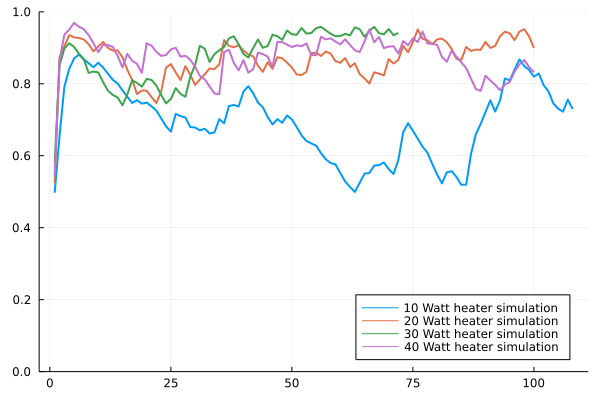

In [745]:
plot(wetness_10W ,label=string(10)*" Watt heater simulation",linewidth=2,ylim=(0,1))
plot!(wetness_20W ,label=string(20)*" Watt heater simulation",linewidth=2,ylim=(0,1))
plot!(wetness_30W ,label=string(30)*" Watt heater simulation",linewidth=2,ylim=(0,1))
plot!(wetness_40W ,label=string(40)*" Watt heater simulation",linewidth=2,ylim=(0,1),legend=:bottomright)
# plot!(wetness_10Ws ,label=string(10)*" Watt heater simulation small",linewidth=2,ylim=(0,1),ylabel="wetness",xlabel="time[s]")
# plot!(wetness_20Ws ,label=string(20)*" Watt heater simulation small",linewidth=2)
# plot!(wetness_30Ws ,label=string(30)*" Watt heater simulation small",linewidth=2)
# plot!(wetness_10W_OHP2 ,label=string(10)*" Watt heater simulation OHP2",linewidth=2)
# plot!(wetness_40W_OHP2 ,label=string(40)*" Watt heater simulation OHP2",linewidth=2)

In [382]:
using Statistics

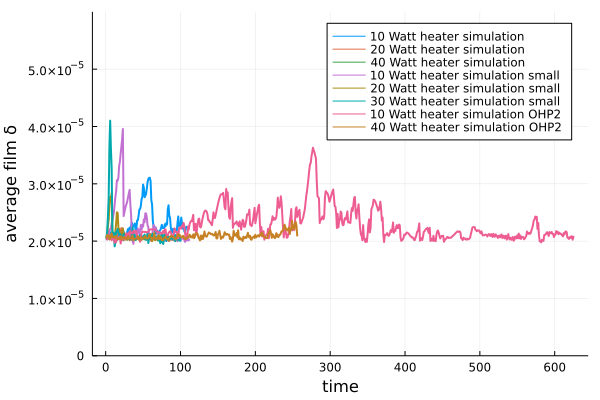

In [548]:
plot(mean([δ_avg_start_10W,δ_avg_end_10W]) ,label=string(10)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
plot!(mean([δ_avg_start_20W,δ_avg_end_20W]) ,label=string(20)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
# plot!(mean([δ_avg_start_30W,δ_avg_end_30W]) ,label=string(30)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
plot!(mean([δ_avg_start_40W,δ_avg_end_40W]) ,label=string(40)*" Watt heater simulation",linewidth=2)
plot!(mean([δ_avg_start_10Ws,δ_avg_end_10Ws]) ,label=string(10)*" Watt heater simulation small",linewidth=2,ylim=(0,6e-5),ylabel="average film δ",xlabel="time")
plot!(mean([δ_avg_start_20Ws,δ_avg_end_20Ws]) ,label=string(20)*" Watt heater simulation small",linewidth=2)
plot!(mean([δ_avg_start_30Ws,δ_avg_end_30Ws]) ,label=string(30)*" Watt heater simulation small",linewidth=2)
plot!(mean([δ_avg_start_10W_OHP2,δ_avg_end_10W_OHP2]) ,label=string(10)*" Watt heater simulation OHP2",linewidth=2)
plot!(mean([δ_avg_start_40W_OHP2,δ_avg_end_40W_OHP2]) ,label=string(40)*" Watt heater simulation OHP2",linewidth=2)

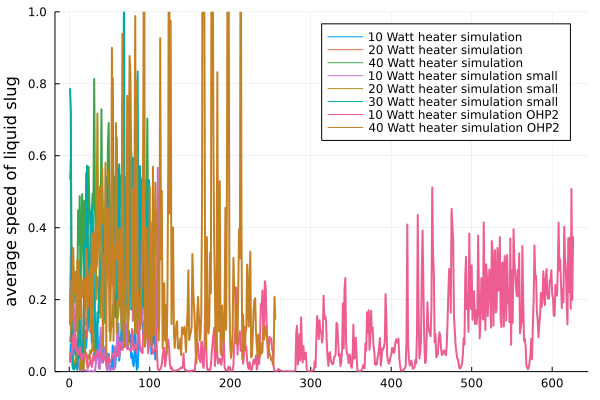

In [549]:
plot(Vabs_avg_10W,label=string(10)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
plot!(Vabs_avg_20W,label=string(20)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
# plot!(Vabs_avg_30W,label=string(30)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
plot!(Vabs_avg_40W,label=string(40)*" Watt heater simulation",linewidth=2,ylim=(0,6e-5))
plot!(Vabs_avg_10Ws,label=string(10)*" Watt heater simulation small",linewidth=2,ylim=(0,1),ylabel="average speed of liquid slug")
plot!(Vabs_avg_20Ws,label=string(20)*" Watt heater simulation small",linewidth=2)
plot!(Vabs_avg_30Ws,label=string(30)*" Watt heater simulation small",linewidth=2)
plot!(Vabs_avg_10W_OHP2,label=string(10)*" Watt heater simulation OHP2",linewidth=2)
plot!(Vabs_avg_40W_OHP2,label=string(40)*" Watt heater simulation OHP2",linewidth=2)

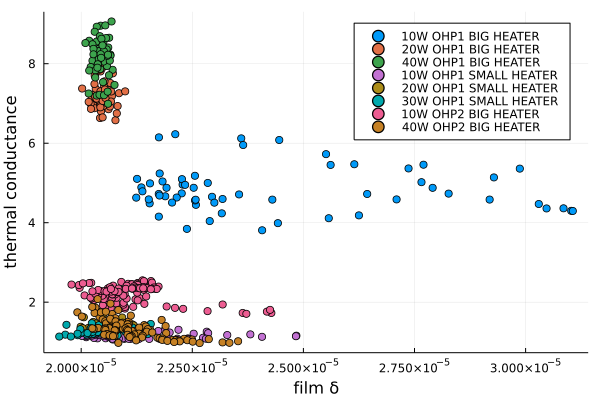

In [653]:
# scatter(Vabs_max,wetness,ylim=(0.5,1),xlim=(0,1.5))
scatter(mean([δ_avg_start_10W,δ_avg_end_10W])[40:100],conductance_10W[40:end],label="10W OHP1 BIG HEATER")
scatter!(mean([δ_avg_start_20W,δ_avg_end_20W])[40:100],conductance_20W[40:100],label="20W OHP1 BIG HEATER")
# scatter!(mean([δ_avg_start_30W,δ_avg_end_30W])[40:100],conductance_30W[40:100],label="30W OHP1 BIG HEATER")
scatter!(mean([δ_avg_start_40W,δ_avg_end_40W])[40:100],conductance_40W[40:100],label="40W OHP1 BIG HEATER",legend=:topright)
scatter!(mean([δ_avg_start_10Ws,δ_avg_end_10Ws])[40:100],conductance_10Ws[40:100],label="10W OHP1 SMALL HEATER",legend=:topright,ylabel="thermal conductance",xlabel="film δ")
scatter!(mean([δ_avg_start_20Ws,δ_avg_end_20Ws])[40:100],conductance_20Ws[40:100],label="20W OHP1 SMALL HEATER")
scatter!(mean([δ_avg_start_30Ws,δ_avg_end_30Ws])[40:100],conductance_30Ws[40:100],label="30W OHP1 SMALL HEATER")
scatter!(mean([δ_avg_start_10W_OHP2,δ_avg_end_10W_OHP2])[end-100:end],conductance_10W_OHP2[end-100:end],label="10W OHP2 BIG HEATER")
scatter!(mean([δ_avg_start_40W_OHP2,δ_avg_end_40W_OHP2])[end-100:end],conductance_40W_OHP2[end-100:end],label="40W OHP2 BIG HEATER")

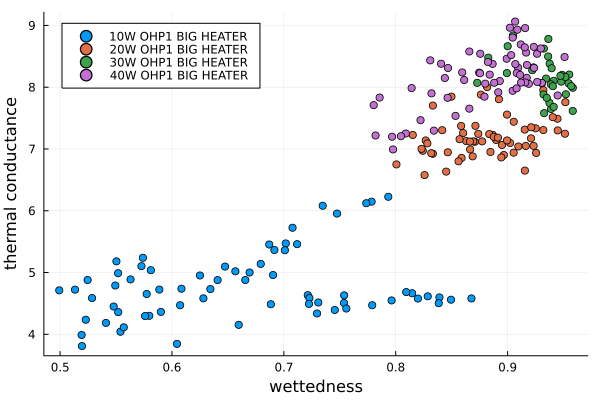

In [767]:
# scatter(Vabs_max,wetness,ylim=(0.5,1),xlim=(0,1.5))
scatter(wetness_10W[40:end],conductance_10W[40:end],label="10W OHP1 BIG HEATER",ylabel="thermal conductance",xlabel="wettedness")
scatter!(wetness_20W[40:end],conductance_20W[40:end],label="20W OHP1 BIG HEATER")
scatter!(wetness_30W[40:end],conductance_30W[40:end],label="30W OHP1 BIG HEATER")
scatter!(wetness_40W[40:end],conductance_40W[40:end],label="40W OHP1 BIG HEATER",legend=:topleft)
# scatter!(wetness_10Ws[40:end],conductance_10Ws[40:end],label="10W OHP1 SMALL HEATER",legend=:topleft)
# scatter!(wetness_20Ws[40:end],conductance_20Ws[40:end],label="20W OHP1 SMALL HEATER")
# scatter!(wetness_30Ws[40:end],conductance_30Ws[40:end],label="30W OHP1 SMALL HEATER")
# scatter!(wetness_40Ws[40:end],conductance_40Ws[40:end],label="40W OHP1 SMALL HEATER")
# scatter!(wetness_10W_OHP2[end-100:end],conductance_10W_OHP2[end-100:end],label="10W OHP2 BIG HEATER")
# scatter!(wetness_40W_OHP2[end-100:end],conductance_40W_OHP2[end-100:end],label="40W OHP2 BIG HEATER")

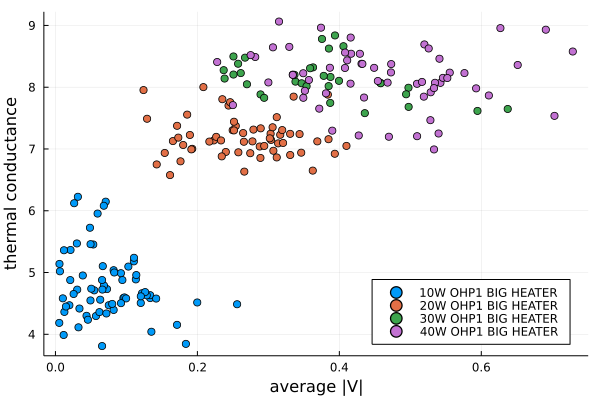

In [766]:
# scatter(Vabs_max,wetness,ylim=(0.5,1),xlim=(0,1.5))
scatter(Vabs_avg_10W[40:end],conductance_10W[40:end],label="10W OHP1 BIG HEATER",ylabel="thermal conductance",xlabel="average |V|")
scatter!(Vabs_avg_20W[40:end],conductance_20W[40:end],label="20W OHP1 BIG HEATER")
scatter!(Vabs_avg_30W[40:end],conductance_30W[40:end],label="30W OHP1 BIG HEATER")
scatter!(Vabs_avg_40W[40:end],conductance_40W[40:end],label="40W OHP1 BIG HEATER",legend=:bottomright)
# scatter!(Vabs_avg_10Ws[40:end],conductance_10Ws[40:end],label="10W OHP1 SMALL HEATER",legend=:bottomright,ylabel="thermal conductance",xlabel="average |V|")
# scatter!(Vabs_avg_20Ws[40:end],conductance_20Ws[40:end],label="20W OHP1 SMALL HEATER")
# scatter!(Vabs_avg_30Ws[40:end],conductance_30Ws[40:end],label="30W OHP1 SMALL HEATER")
# scatter!(Vabs_avg_10W_OHP2[end-100:end],conductance_10W_OHP2[end-100:end],label="10W OHP2 BIG HEATER")
# scatter!(Vabs_avg_40W_OHP2[end-100:end],conductance_40W_OHP2[end-100:end],label="40W OHP2 BIG HEATER")

In [451]:
tend = round(tube_hist[end].t)
boil_dt = 0.1
boil_num_t,boil_num_x = getboilhist(sysfinal,tend,boil_dt);

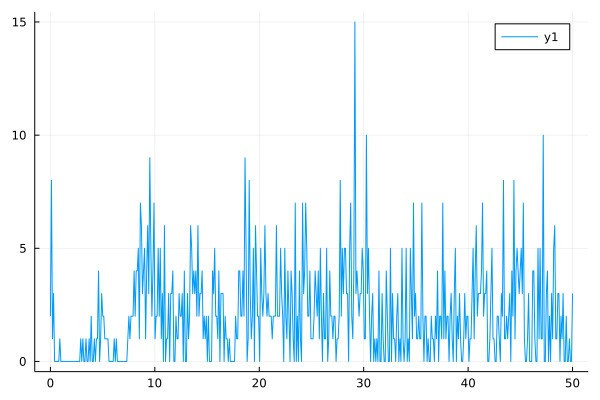

In [131]:
plot(range(0,stop=tend,length=length(boil_num_t)),boil_num_t)

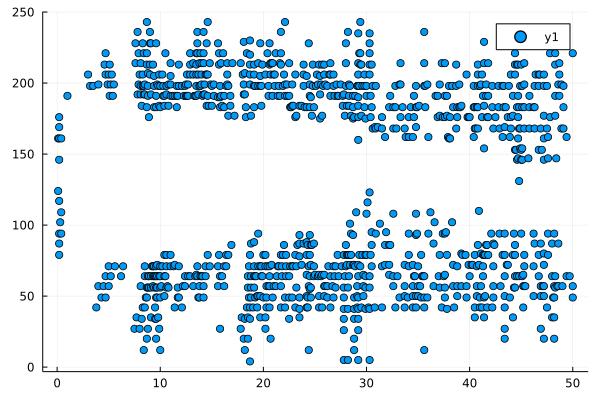

In [132]:
scatter(boil_data[:,2],boil_data[:,1])

In [404]:
ohp

LoadError: UndefVarError: ohp not defined

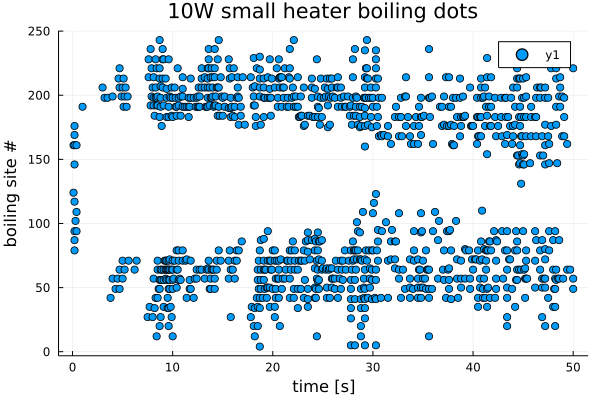

In [133]:
scatter(boil_data[:,2],boil_data[:,1],title="10W small heater boiling dots",xlabel="time [s]",ylabel="boiling site #")

In [624]:
filepath_10W = "20171017_F_YS_%23025a_O001_H001_P010_expA.xlsx"
filepath_20W = "20170921_F_IC_%23002_O001_H001_P020_expA.xlsx"
filepath_30W = "20170925_F_IC_%23003_O001_H001_P030_expA.xlsx"
filepath_40W = "20170928_F_IC_%23004_O001_H001_P040_expA.xlsx"

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_10W)
Onum, Hnum, power = getconfig(filepath_10W)
RTD,RTDt_10W = getRTD(xf,Onum);
conductance_10W_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_20W)
Onum, Hnum, power = getconfig(filepath_20W)
RTD,RTDt_20W = getRTD(xf,Onum);
conductance_20W_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_30W)
Onum, Hnum, power = getconfig(filepath_30W)
RTD,RTDt_30W = getRTD(xf,Onum);
conductance_30W_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_40W)
Onum, Hnum, power = getconfig(filepath_40W)
RTD,RTDt_40W = getRTD(xf,Onum);
conductance_40W_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

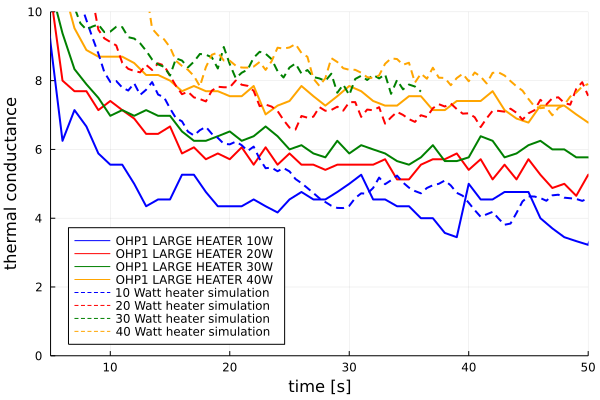

In [742]:
plot(RTDt_10W,conductance_10W_exp,ylim=(0,10),xlim=(5,50),linecolor=:blue,linewidth=2,label="OHP1 LARGE HEATER 10W",ylabel="thermal conductance",xlabel="time [s]",legend=:bottomleft)
plot!(RTDt_20W,conductance_20W_exp,linewidth=2,linecolor=:red,label="OHP1 LARGE HEATER 20W")
plot!(RTDt_30W,conductance_30W_exp,linewidth=2,linecolor=:green,label="OHP1 LARGE HEATER 30W")
plot!(RTDt_40W,conductance_40W_exp,linewidth=2,linecolor=:orange,label="OHP1 LARGE HEATER 40W")
plot!(thist_10W,conductance_10W ,label=string(10)*" Watt heater simulation",linecolor=:blue,linewidth=2,linestyle=:dash)
plot!(thist_20W,conductance_20W ,label=string(20)*" Watt heater simulation",linecolor=:red,linewidth=2,linestyle=:dash)
plot!(thist_30W,conductance_30W ,label=string(30)*" Watt heater simulation",linecolor=:green,linewidth=2,linestyle=:dash)
plot!(thist_40W,conductance_40W ,label=string(40)*" Watt heater simulation",linecolor=:orange,linewidth=2,linestyle=:dash)

In [647]:
filepath_10Ws = "20190607_F_PD_%23013_O001_H002_P010_expA.xlsx"
filepath_20Ws = "20190608_F_PD_%23014_O001_H002_P020_expA.xlsx"
filepath_30Ws = "20190614_F_PD_%23015_O001_H002_P030_expA.xlsx"
filepath_40Ws = "20190617_F_PD_%23016_O001_H002_P040_expA.xlsx"
xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_10Ws)
Onum, Hnum, power = getconfig(filepath_10Ws)
RTD,RTDt_10Ws = getRTD(xf,Onum);
conductance_10Ws_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_20Ws)
Onum, Hnum, power = getconfig(filepath_20Ws)
RTD,RTDt_20Ws = getRTD(xf,Onum);
conductance_20Ws_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_30Ws)
Onum, Hnum, power = getconfig(filepath_30Ws)
RTD,RTDt_30Ws = getRTD(xf,Onum);
conductance_30Ws_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath_40Ws)
Onum, Hnum, power = getconfig(filepath_40Ws)
RTD,RTDt_40Ws = getRTD(xf,Onum);
conductance_40Ws_exp = power ./ (RTD[:,i1] .- RTD[:,i2]);

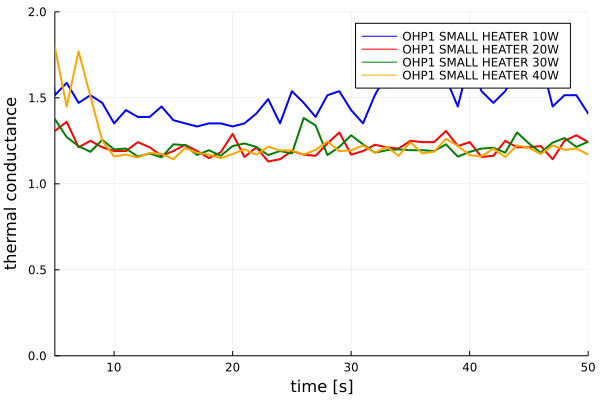

In [744]:
plot(RTDt_10Ws,conductance_10Ws_exp,ylim=(0,2),xlim=(5,50),linecolor=:blue,linewidth=2,label="OHP1 SMALL HEATER 10W",ylabel="thermal conductance",xlabel="time [s]",legend=:topright)
plot!(RTDt_20Ws,conductance_20Ws_exp,linewidth=2,linecolor=:red,label="OHP1 SMALL HEATER 20W")
plot!(RTDt_30Ws,conductance_30Ws_exp,linewidth=2,linecolor=:green,label="OHP1 SMALL HEATER 30W")
plot!(RTDt_40Ws,conductance_40Ws_exp,linewidth=2,linecolor=:orange,label="OHP1 SMALL HEATER 40W")

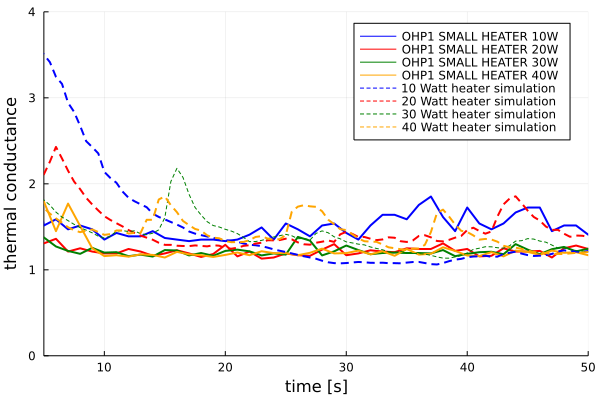

In [652]:
plot(RTDt_10Ws,conductance_10Ws_exp,ylim=(0,4),xlim=(5,50),linecolor=:blue,linewidth=2,label="OHP1 SMALL HEATER 10W",ylabel="thermal conductance",xlabel="time [s]",legend=:topright)
plot!(RTDt_20Ws,conductance_20Ws_exp,linewidth=2,linecolor=:red,label="OHP1 SMALL HEATER 20W")
plot!(RTDt_30Ws,conductance_30Ws_exp,linewidth=2,linecolor=:green,label="OHP1 SMALL HEATER 30W")
plot!(RTDt_40Ws,conductance_40Ws_exp,linewidth=2,linecolor=:orange,label="OHP1 SMALL HEATER 40W")
plot!(thist_10Ws,conductance_10Ws ,label=string(10)*" Watt heater simulation",linecolor=:blue,linewidth=2,linestyle=:dash)
plot!(thist_20Ws,conductance_20Ws ,label=string(20)*" Watt heater simulation",linecolor=:red,linewidth=2,linestyle=:dash)
plot!(thist_30Ws,conductance_30Ws ,label=string(30)*" Watt heater simulation",linecolor=:green,linestyle=:dash)
plot!(thist_40Ws,conductance_40Ws ,label=string(40)*" Watt heater simulation",linecolor=:orange,linewidth=2,linestyle=:dash)

In [ ]:
filepath_10Ws = "20170914_F_IC_%23005_O002_H001_P010_expA.xlsx"
filepath_20Ws = "20170922_F_IC_%23006_O002_H001_P020_expA.xlsx"
filepath_30Ws = "20170926_F_IC_%23007_O002_H001_P030_expA.xlsx"
filepath_40Ws = "20170929_F_IC_%23008_O002_H001_P040_expA.xlsx"

In [248]:
# filepath = "20171004_F_IC_%23017_O002_H002_P010_expA.xlsx"
# filepath = "20171009_F_IC_%23018_O002_H002_P020_expA.xlsx"
# filepath = "20171011_F_IC_%23019_O002_H002_P030_expA.xlsx"
filepath = "20171013_F_IC_%23020_O002_H002_P040_expA.xlsx"
xf = XLSX.readxlsx(dirname(dirname(dirname(pwd())))*"/OHPexp/"*filepath)

Onum, Hnum, power = getconfig(filepath)
RTD,RTDt = getRTD(xf,Onum);
conductance = power ./ (RTD[:,i1] .- RTD[:,i2]);

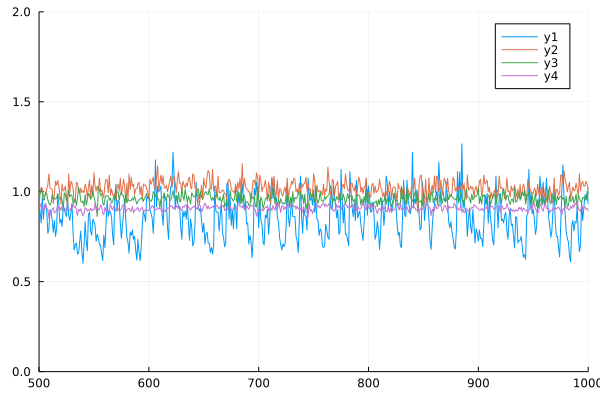

In [249]:
plot!(RTDt,conductance,ylim=(0,2),xlim=(500,1000))

## plot boiling heatmap

0.09300000000000001

In [530]:
tend = round(tube_hist[end].t)
boil_dt = 0.1
boil_num_t,boil_num_x = getboilhist(sysfinal,tend,boil_dt);

In [531]:
ql = sys.qline[1]
interp_linear_x = LinearInterpolation(ql.arccoord, ql.body.x,extrapolation_bc = Line());
interp_linear_y = LinearInterpolation(ql.arccoord, ql.body.y,extrapolation_bc = Line());

xstations = interp_linear_x[sysfinal[end].wall.Xstations]
ystations = interp_linear_y[sysfinal[end].wall.Xstations];

In [532]:
maximum(boil_num_x[:])

78.0

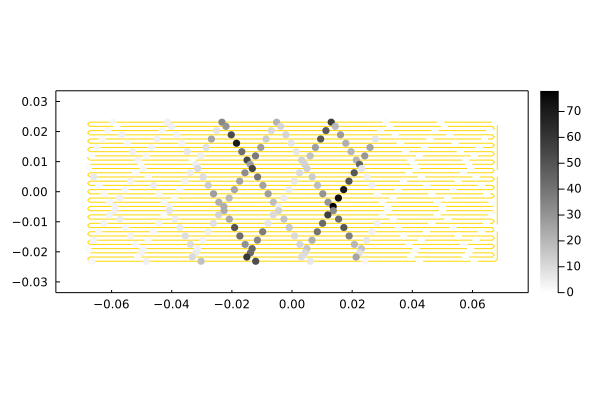

In [533]:
ohp = sys.qline[1].body
gd = sys.grid
scatter()
plot!(ohp,fillalpha=0,xlim=gd.xlim[1],ylim=gd.xlim[2],linecolor=:gold,framestyle = :box)
scatter!(xstations,ystations,marker_z=boil_num_x[:],markerstrokewidth=0,markercolor=cgrad(:greys, rev = true))